In [71]:
import cv2
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import re
import numpy as np
from PIL import ImageFilter
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
vidcap = cv2.VideoCapture('data/videos/bunny.mp4')
success,image = vidcap.read()
count = 0

while success:
    cv2.imwrite("data/videos/bunny_frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    # print('Read a new frame: ', success)
    count += 1

In [ ]:
for frame in os.listdir('data/videos/bunny_frames/'):
    print(frame)

In [ ]:
img = Image.open('data/videos/bunny_frames/frame1.jpg')
img.show()
print(img.size)

In [57]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
print(x_train.shape)
print(x_test.shape)

# im = Image.fromarray(np.uint8(x_train[0, :, :, :]))
# im.show()
# b = im.resize((50,50))
# b.show()

# for row in x_train:
#     img = Image.fromarray(np.uint8(row))
#     r,g,b = img.split()
    
print(x_train.shape[0])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
50000


In [29]:
regex = re.compile(r'\d+')
frame = "frame99.jpg"
frame_num = regex.findall(frame)[0]
print(frame_num)
print(type(frame_num))

99
<class 'str'>


In [84]:
import os
os.system('ffmpeg -framerate 22 -i ./data/videos/mosaic_bunny_frames/frame%d.jpg output.mp4')

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/alex/anaconda3/envs/video_mosaic --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostpro

0

In [31]:
img_df = pd.read_csv('data/image_database.csv')
print(len(img_df))
for row in img_df.values:
    print(row[1])
    a = np.fromstring(row[1])
    print(a)
    break

35639
[[167 177 168 ... 204 206 200]
 [165 172 168 ... 193 201 204]
 [162 170 168 ... 201 207 198]
 ...
 [ 74  73  78 ...  15  19  39]
 [ 57  62  62 ...  16  20  21]
 [ 28  42  24 ...  20  18  27]]


/tmp/ipykernel_1636/3701502253.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a = np.fromstring(row[1])


ValueError: string size must be a multiple of element size

In [20]:
len(os.listdir('data/images/'))

168249

In [65]:
target_points = np.array([[0,0,0]])

print(target_points.shape)

new_point = np.array([[4, 5, 6]])
target_points = np.append(target_points, [[4,5,6]], axis=0)
new_point = np.array([[7, 8, 9]])
target_points = np.append(target_points, new_point, axis=0)

print(target_points.shape)

# target_points = np.delete(target_points, [0,0])
target_points = target_points[1:]

print(target_points.shape)
print(target_points)

for point in target_points:
    r = point[0]
    g = point[1]
    b = point[2]
    
    print(str(r) + ' ' + str(g) + ' ' + str(b))

(1, 3)
(3, 3)
(2, 3)
[[4 5 6]
 [7 8 9]]
4 5 6
7 8 9


In [66]:
t = 'l1'
print(t=='l1')

True


In [67]:
for point in range(0,len(target_points)):
    print(target_points[point])

[4 5 6]
[7 8 9]


In [70]:
target_points[:, 0]


array([4, 7])

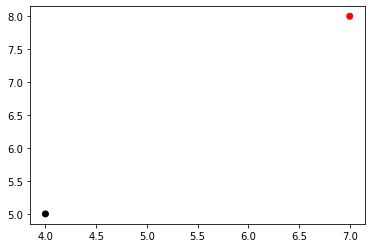

In [75]:
# red graph
plt.scatter(target_points[:,0],target_points[:,1],color=['black','red'])

In [80]:
a = np.zeros((9999,4))
a
df = pd.DataFrame(a)
df.to_pickle("df.pkl")
r =pd.read_pickle("df.pkl")
r

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
9994,0.0,0.0,0.0,0.0
9995,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0
